# Drive mount and importing libraries

In [183]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [184]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

In [185]:
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from numpy import newaxis
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from math import pi,sqrt,exp,pow,log
from numpy.linalg import det, inv
from abc import ABCMeta, abstractmethod
from sklearn import cluster

import statsmodels.api as sm 
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from time import time

import matplotlib.ticker as tkr
%matplotlib inline

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
    
import math

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [187]:
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from numpy import newaxis
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

from math import pi,sqrt,exp,pow,log
from numpy.linalg import det, inv
from abc import ABCMeta, abstractmethod
from sklearn import cluster

import statsmodels.api as sm 
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats



# Loading data and pre-processing

In [188]:
df = pd.read_csv("/content/drive/My Drive/prices + sentiments.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             142 non-null    object 
 1   Unnamed: 0       142 non-null    int64  
 2   Date             142 non-null    object 
 3   Source           142 non-null    object 
 4   Title            142 non-null    object 
 5   Body             142 non-null    object 
 6   index            142 non-null    int64  
 7   timestamp        142 non-null    int64  
 8   timestampString  142 non-null    object 
 9   uid              142 non-null    object 
 10  url              142 non-null    object 
 11  url_uid          142 non-null    int64  
 12  compound         142 non-null    float64
 13  neg              142 non-null    float64
 14  neu              142 non-null    float64
 15  pos              142 non-null    float64
 16  mean_compound    142 non-null    float64
 17  Adj Close       

# Tuning

In [189]:
split = (0.85);
sequence_length=10;
normalise= True
batch_size=25;
input_dim=2
input_timesteps=9
neurons=1000
epochs=15
prediction_len=1
dense_output=1
drop_out=0.2

## Splitting data

In [190]:
cols = ['Adj Close','mean_compound']

In [191]:
dataframe =df

In [192]:
len_dataframe=dataframe.shape[0]

In [193]:
i_split = int(len(dataframe) * split)
data_train = dataframe.get(cols).values[:i_split]
data_test  = dataframe.get(cols).values[i_split:]
len_train  = len(data_train)
len_test   = len(data_test)
len_train_windows = None
print('data_train.shape',data_train.shape)
print('data_test.shape',data_test.shape)


data_train.shape (120, 2)
data_test.shape (22, 2)


In [194]:
data_train[0:5]

data_test[0:5]


array([[80.44000244, -0.5719    ],
       [82.44000244,  0.3818    ],
       [82.95999908, -0.5719    ],
       [83.87000275, -0.7003    ],
       [83.76000214, -0.875     ]])

In [195]:
#get_test_data   
data_windows = []
for i in range(len_test - sequence_length):
    data_windows.append(data_test[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)
 # get original y_test
y_test_ori = data_windows[:, -1, [0]]
print('y_test_ori.shape',y_test_ori.shape)

window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]
normalised_data = []
record_min=[]
record_max=[]

y_test_ori.shape (12, 1)


Normalizing 

In [196]:
#normalize
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,1):#col_num):
      temp_col=window_data[win_i,:,col_i]
      temp_min=min(temp_col)
      if col_i==0:
        record_min.append(temp_min)#record min
      temp_col=temp_col-temp_min
      temp_max=max(temp_col)
      if col_i==0:
        record_max.append(temp_max)#record max
      temp_col=temp_col/temp_max
      normalised_window.append(temp_col)
    for col_i in range(1,col_num):
      temp_col=window_data[win_i,:,col_i]
      normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

In [197]:
# normalised_data=window_data
data_windows=normalised_data#get_test_data
x_test = data_windows[:, :-1]
y_test = data_windows[:, -1, [0]]
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

x_test.shape (12, 9, 2)
y_test.shape (12, 1)


In [198]:

# In[20]:


x_test[0]


# In[21]:


y_test


# In[22]:

array([[0.33904144],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.10909063],
       [0.        ],
       [0.        ],
       [0.20612611],
       [0.32099549],
       [0.30763948],
       [0.37581693],
       [0.39165044]])

In [199]:
#get_train_data 
data_windows = []
for i in range(len_train - sequence_length):
    data_windows.append(data_train[i:i+sequence_length])
data_windows = np.array(data_windows).astype(float)

In [200]:
window_data=data_windows
win_num=window_data.shape[0]
col_num=window_data.shape[2]

normalised_data = []

In [201]:
for win_i in range(0,win_num):
    normalised_window = []
    for col_i in range(0,1):#col_num):
      temp_col=window_data[win_i,:,col_i]
      temp_min=min(temp_col)
      if col_i==0:
        record_min.append(temp_min)#record min
      temp_col=temp_col-temp_min
      temp_max=max(temp_col)
      if col_i==0:
        record_max.append(temp_max)#record max
      temp_col=temp_col/temp_max
      normalised_window.append(temp_col)
    for col_i in range(1,col_num):
      temp_col=window_data[win_i,:,col_i]
      normalised_window.append(temp_col)
    normalised_window = np.array(normalised_window).T
    normalised_data.append(normalised_window)
normalised_data=np.array(normalised_data)

In [202]:
# normalised_data=window_data
data_windows=normalised_data
x_train = data_windows[:, :-1]
y_train = data_windows[:, -1,[0]]
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)


x_train.shape (110, 9, 2)
y_train.shape (110, 1)


In [203]:

# In[25]:


x_train[0]


# In[28]:


y_train[0:5]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# The Long Short-term memory model

In [204]:

# LSTM MODEL
model = Sequential()
model.add(LSTM(neurons, input_shape=(input_timesteps, input_dim), return_sequences = True))
model.add(Dropout(drop_out))
model.add(LSTM(neurons,return_sequences = True))
model.add(LSTM(neurons,return_sequences =False))
model.add(Dropout(drop_out))
model.add(Dense(dense_output, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error',
                optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 9, 1000)           4012000   
                                                                 
 dropout_12 (Dropout)        (None, 9, 1000)           0         
                                                                 
 lstm_19 (LSTM)              (None, 9, 1000)           8004000   
                                                                 
 lstm_20 (LSTM)              (None, 1000)              8004000   
                                                                 
 dropout_13 (Dropout)        (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 20,021,001
Trainable params: 20,021,001


In [205]:
x_train.shape

(110, 9, 2)

In [206]:
y_train.shape

(110, 1)

In [207]:
# Fit the model
# Fit the model
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=epochs,batch_size=batch_size, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Epoch 1/15
5/5 [==============================] - 13s 2s/step - loss: 1.0092 - val_loss: 0.0355
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 0.3973 - val_loss: 0.5164
Epoch 3/15
5/5 [==============================] - 6s 1s/step - loss: 0.1922 - val_loss: 0.5092
Epoch 4/15
5/5 [==============================] - 6s 1s/step - loss: 0.2347 - val_loss: 0.2044
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.1405 - val_loss: 0.5944
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.2172 - val_loss: 0.1287
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 0.1441 - val_loss: 0.4437
Epoch 8/15
5/5 [==============================] - 6s 1s/step - loss: 0.1504 - val_loss: 0.2688
Epoch 9/15
5/5 [==============================] - 6s 1s/step - loss: 0.1409 - val_loss: 0.2069
Epoch 10/15
5/5 [==============================] - 6s 1s/step - loss: 0.1179 - val_loss: 0.2934
Epoch 11/15
5/5 [==============================]

In [208]:
# In[30]:

# model predictions

#model.predict(x_test)
train_predict = model.predict(x_train)
test_predict  = model.predict(x_test)


In [209]:

#multi sequence predict
data=x_test
prediction_seqs = []
window_size=sequence_length
pre_win_num=int(len(data)/prediction_len)

for i in range(0,pre_win_num):
    curr_frame = data[i*prediction_len]
    predicted = []
    for j in range(0,prediction_len):
      temp=model.predict(curr_frame[newaxis,:,:])[0]
      predicted.append(temp)
      curr_frame = curr_frame[1:]
      curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
    prediction_seqs.append(predicted)
    
print(prediction_seqs)

[[array([0.6161058], dtype=float32)], [array([0.5386234], dtype=float32)], [array([0.71313334], dtype=float32)], [array([0.6499932], dtype=float32)], [array([0.56656784], dtype=float32)], [array([0.48361465], dtype=float32)], [array([0.41394052], dtype=float32)], [array([0.3292432], dtype=float32)], [array([0.42693847], dtype=float32)], [array([0.46176574], dtype=float32)], [array([0.53505373], dtype=float32)], [array([0.81260073], dtype=float32)]]


In [210]:

#de_predicted
de_predicted=[]
len_pre_win=int(len(data)/prediction_len)
len_pre=prediction_len

m=0
for i in range(0,len_pre_win):
    for j in range(0,len_pre):
      de_predicted.append(prediction_seqs[i][j][0]*record_max[m]+record_min[m])
      m=m+1
print(de_predicted)


[82.40805784819464, 81.81253468847272, 79.91670155937317, 78.87488902027252, 77.49837086016777, 75.27760669821336, 73.04862728233886, 71.41924268422821, 72.95012724907677, 72.96945772568745, 72.80905865031949, 70.34738282983095]


# Performance

In [211]:
# In[33]:


error = []
diff=y_test.shape[0]-prediction_len*pre_win_num

for i in range(y_test_ori.shape[0]-diff):
    error.append(y_test_ori[i,] - de_predicted[i])
    
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val) 
    absError.append(abs(val))

error_percent=[]
for i in range(len(error)):
    val=absError[i]/y_test_ori[i,]
    val=abs(val)
    error_percent.append(val)

mean_error_percent=sum(error_percent) / len(error_percent)
accuracy=1-mean_error_percent

MSE=sum(squaredError) / len(squaredError)

print("MSE",MSE)
print('accuracy',accuracy)
print('mean_error_percent',mean_error_percent)

MSE [38.91287324]
accuracy [0.92701113]
mean_error_percent [0.07298887]


## Libraries

In [212]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from time import time

import matplotlib.ticker as tkr
%matplotlib inline

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
    
import math

# Plotting the learning curve

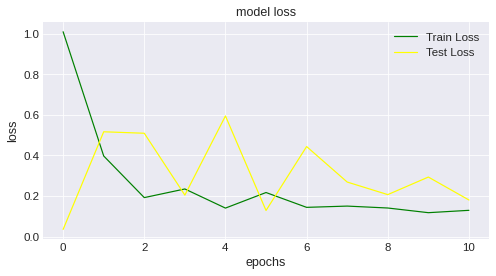

In [213]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')

plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();